# Fundamentals of Machine Learning - Exercise 7
Goal of the excercise is to code selected part of the Decision tree algorithm which is focused on the optimum split part using gini index.

After that the scikit-learn implementation of the Decision tree basic usage will be demonstrated.

![meme02](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_07_meme_02.jpg?raw=true)


In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Load the *Iris* dataset
https://archive.ics.uci.edu/dataset/53/iris
* One of the earliest datasets used in the literature on classification methods and widely used in statistics and machine learning.
* The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.
* One class is linearly separable from the other 2 - the latter are not linearly separable from each other.uted?

|Variable Name | Role | Type | Units |
|:-------|:-------|:-------|:-------|
|sepal length | Feature | Continuous | cm |
|sepal width | Feature | Continuous | cm |
|petal length | Feature | Continuous | cm |
|petal width | Feature | Continuous | cm |
|class | Target | Categorical | Iris Setosa, Iris Versicolour, or Iris Virginica |

In [143]:
df = pd.read_csv('https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/raw/master/datasets/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 💡 Let's take a look at the data first
* 🔎 Do you have an idea how would you divide the data into groupd based on the assigned classed by vertical or horizontal lines?

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

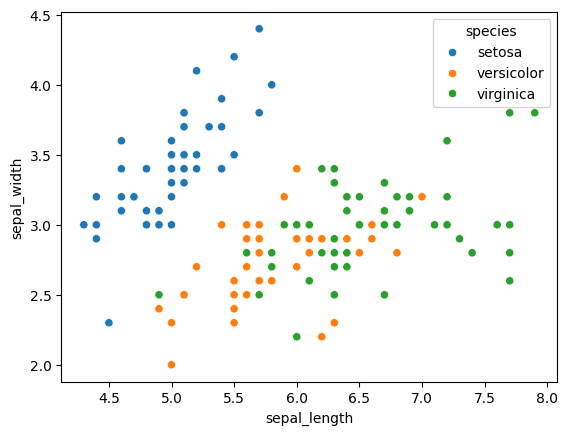

In [144]:
sns.scatterplot(data = df, x='sepal_length', y='sepal_width', hue='species')

# And now? 😊

<Axes: xlabel='petal_length', ylabel='petal_width'>

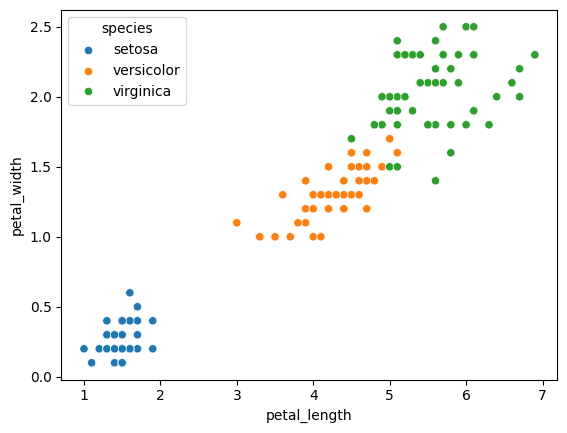

In [145]:
sns.scatterplot(data = df, x='petal_length', y='petal_width', hue='species')

# Also it's always reasonable to take a look at the number of classes in the dataset
* 💡You need to know beforehand about missing values or imbalance of labels

In [146]:
df.species.value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


# 🔎 What is the purpose of the classification algorithms?
* How the algorithms work in general?
* How does **Decision tree** work in a very simple terms?
    * What is a split?
        * 🔎 Is the data separated only by vertical/horizontal lines or are there any inclined straight lines or curves used?
    * How can we decide on **which feature** and on **which condition** we should split?
    * What is in the leaf of the **Decision tree**?
        * **When** will the decision tree **stop the growth**?

# 📊 Gini Index
* What does it tell us?
    * What is the **minimum** and **maximum** value for 2 classes?
    * And for three?
    * What result should we expect for the whole data set?

## 🚀 Compute the gini index for the whole data set
* 💡 Take a look at [these slides](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/misc/mad3_07.pdf) for the formulas and examples

![meme03](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_07_meme_03.jpg?raw=true)

### Formulas

* Gini index:
  
$$
G(S) = 1 - \sum_{j=1}^{k} p_{j}^{2}
$$

* where the $p_{j}$  is a fraction of points that belongs to the class j from a set S$

* Gini impurity:
$$
G(S \Rightarrow S_{1},...,S_{r}) = \sum_{i=1}^{r} \frac{S_i}{S} G(S_i)
$$

In [147]:
def gini_index(data: pd.DataFrame):
    counts = {}
    total_count = 0

    for row in data.itertuples():
        counts[row.species] = counts.get(row.species, 0) + 1
        total_count += 1

    gini = 1 - sum((count / total_count) ** 2 for count in counts.values())

    return gini

In [148]:
gini_index(df)

0.6666666666666667

## 🚀 Take only the *sepal_width* attribute
* Try to split the by attribute by value *3.35 (<= 3.35)*
* Compute the gini index for the left and the right side of the split
    * Left: 0.629
    * Right: 0.285
* Compute the total gini impurity for this split
    * Total: 0.546

    
**How to solve the example?**
$$
Gini(left) = 1 - \left[ \left(\frac{45}{114}\right)^2 + \left(\frac{49}{114}\right)^2 + \left(\frac{20}{114}\right)^2 \right] = 0.629
$$

$$
Gini(right) = 1 - \left[ \left(\frac{5}{36}\right)^2 + \left(\frac{1}{36}\right)^2 + \left(\frac{30}{36}\right)^2 \right] = 0.285
$$

$$
GiniImpurity = \frac{|df_{left}|}{|df|} * Gini(left) + \frac{|df_{right}|}{|df|} * Gini(right) =  \frac{114}{150} * 0.629 + \frac{36}{150} * 0.285 = 0.546
$$



In [149]:
gini_left = gini_index(df[df['sepal_width'] <= 3.35])
gini_left

0.6286549707602339

In [150]:
gini_right = gini_index(df[df['sepal_width'] > 3.35])
gini_right

0.28549382716049376

In [151]:
def giniimpurity(data, attibute, value):
    gini_left = gini_index(df[df[attibute] <= value])
    gini_right = gini_index(df[df[attibute] > value])

    return (len(df[df[attibute] <= value]) / len(df)) * gini_left + (len(df[df[attibute] > value]) / len(df)) * gini_right

giniimpurity(df, 'sepal_width', 3.35)

0.5462962962962963

# 🎯 Repeat the process for the all 4 attributes and find the best split
* You will try all the possible boundaries along all the features, i.e. all the axes petal width and sepal width.
    * 💡 How to set the boundary?
        * Select only the unique values of the chosen attribute (.unique() function)
        * Sort the values (np.sort())
        * Iterate over the array of the values, take every two consecutive numbers and compute their mean
        * The mean is the current split boundary
* For each split the algorithm will compute the **Gini impurity** of the two groups created.
* 💡 Finally you will choose the decision boundary (best split) that gives the lowest Gini impurity for the two groups from all the 4 attbibutes

### Results:
* index = 0, Sepal Length < 5.45, Gini = 0.44
* index = 1, Sepal Width < 3.35, Gini = 0.54
* index = 2, Petal Length < 2.45, Gini = 0.33
* index = 3, Petal Width < 0.80, Gini = 0.33

* **Selected split:**
    * **index = 2, Petal Length < 2.45, Gini = 0.33**
    * ... or index = 3, Petal Width < 0.80, Gini = 0.33

# 🔎 If we have only one split - how will the classification rule-set look like?

In [152]:
def print_splits(df: pd.DataFrame, column: str) -> None:
    pass

## sepal_length

* Gini: 0.662, Boundary: 4.35
* Gini: 0.648, Boundary: 4.45
* Gini: 0.644, Boundary: 4.55
* Gini: 0.624, Boundary: 4.65
* Gini: 0.614, Boundary: 4.75
* Gini: 0.587, Boundary: 4.85
* Gini: 0.581, Boundary: 4.95
* Gini: 0.547, Boundary: 5.05
* Gini: 0.498, Boundary: 5.15
* Gini: 0.482, Boundary: 5.25
* Gini: 0.474, Boundary: 5.35
* Gini: 0.439, Boundary: 5.45
* Gini: 0.449, Boundary: 5.55
* Gini: 0.475, Boundary: 5.65
* Gini: 0.475, Boundary: 5.75
* Gini: 0.492, Boundary: 5.85
* Gini: 0.500, Boundary: 5.95
* Gini: 0.512, Boundary: 6.05
* Gini: 0.520, Boundary: 6.15
* Gini: 0.528, Boundary: 6.25
* Gini: 0.558, Boundary: 6.35
* Gini: 0.580, Boundary: 6.45
* Gini: 0.598, Boundary: 6.55
* Gini: 0.591, Boundary: 6.65
* Gini: 0.603, Boundary: 6.75
* Gini: 0.608, Boundary: 6.85
* Gini: 0.617, Boundary: 6.95
* Gini: 0.609, Boundary: 7.05
* Gini: 0.614, Boundary: 7.15
* Gini: 0.629, Boundary: 7.25
* Gini: 0.634, Boundary: 7.35
* Gini: 0.639, Boundary: 7.50
* Gini: 0.644, Boundary: 7.65
* Gini: 0.662, Boundary: 7.80
* Best -> Gini: 0.439, Boundary: 5.45

In [153]:
print_splits(df, 'sepal_length')

## sepal_width

In [154]:
print_splits(df, 'sepal_width')

## petal_length

In [155]:
print_splits(df, 'petal_length')

## petal_width

In [156]:
print_splits(df, 'petal_width')

# 🎯 Split the data using the selected split criterion - ✅ Task (2p)
* 💡 **Use the one using petal_length 😊**

1) Repeat the whole process one more time for the part of the data with more than 1 class
   
2) Find the best split again

3) Draw the decision tree with the two defined levels you have created this way
    * You can use any graphic editor you like, even the MS Paint 😃

In [157]:
split_value = 2.45
df_petal_left = df[df['petal_length'] <= split_value]
df_petal_right = df[df['petal_length'] > split_value]

left_split_counts = df_petal_left['species'].value_counts()
right_split_counts = df_petal_right['species'].value_counts()

first_split_distribution_df = pd.DataFrame(
{
    "LS Counts": left_split_counts,
    "RS Counts": right_split_counts
}
).fillna(0).astype(int)

first_split_distribution_df

,LS Counts,RS Counts
species,,
setosa,50,0
versicolor,0,50
virginica,0,50


In [158]:
def print_splits(data, column):
    splits = []
    unique_values = np.sort(data[column].unique())
    for value in unique_values:
        left_split = data[data[column] <= value]
        right_split = data[data[column] > value]

        def gini(group):
            classes = group['species'].value_counts(normalize=True)
            return 1.0 - sum(classes ** 2)

        left_gini = gini(left_split)
        right_gini = gini(right_split)
        weighted_gini = (len(left_split) / len(data)) * left_gini + (len(right_split) / len(data)) * right_gini
        splits.append((value, weighted_gini))

    return splits

for c in df_petal_right.columns[:-1]:
    print(f'{c}')
    splits = print_splits(df_petal_right, c)
    for value, gini_value in splits:
        print(f'Gini: {gini_value:.3f}, Boundary: {value}')
    print(''.join(['-' for _ in range(50)]))

sepal_length
Gini: 0.500, Boundary: 4.9
Gini: 0.495, Boundary: 5.0
Gini: 0.491, Boundary: 5.1
Gini: 0.486, Boundary: 5.2
Gini: 0.481, Boundary: 5.4
Gini: 0.453, Boundary: 5.5
Gini: 0.434, Boundary: 5.6
Gini: 0.411, Boundary: 5.7
Gini: 0.423, Boundary: 5.8
Gini: 0.418, Boundary: 5.9
Gini: 0.407, Boundary: 6.0
Gini: 0.393, Boundary: 6.1
Gini: 0.394, Boundary: 6.2
Gini: 0.418, Boundary: 6.3
Gini: 0.436, Boundary: 6.4
Gini: 0.453, Boundary: 6.5
Gini: 0.437, Boundary: 6.6
Gini: 0.439, Boundary: 6.7
Gini: 0.440, Boundary: 6.8
Gini: 0.447, Boundary: 6.9
Gini: 0.432, Boundary: 7.0
Gini: 0.438, Boundary: 7.1
Gini: 0.457, Boundary: 7.2
Gini: 0.462, Boundary: 7.3
Gini: 0.468, Boundary: 7.4
Gini: 0.474, Boundary: 7.6
Gini: 0.495, Boundary: 7.7
Gini: 0.500, Boundary: 7.9
--------------------------------------------------
sepal_width
Gini: 0.495, Boundary: 2.0
Gini: 0.495, Boundary: 2.2
Gini: 0.481, Boundary: 2.3
Gini: 0.464, Boundary: 2.4
Gini: 0.478, Boundary: 2.5
Gini: 0.477, Boundary: 2.6
Gini: 

In [159]:
best_split_value = None
best_gini = float('inf')
splits_for_petal_length = print_splits(df_petal_right, 'petal_length')

for value, gini_value in splits_for_petal_length:
    if gini_value < best_gini:
        best_gini = gini_value
        best_split_value = value

df_petal_right_left = df_petal_right[df_petal_right['petal_length'] <= best_split_value]
df_petal_right_right = df_petal_right[df_petal_right['petal_length'] > best_split_value]

right_left_split_counts = df_petal_right_left['species'].value_counts()
right_right_split_counts = df_petal_right_right['species'].value_counts()

second_split_distribution_df = pd.DataFrame(
{
    "LS Counts": right_left_split_counts,
    "RS Counts": right_right_split_counts
}
).fillna(0).astype(int)

second_split_distribution_df

,LS Counts,RS Counts
species,,
versicolor,44,6
virginica,1,49


# Decision Tree

### Root Node
- **Podmínka**: `petal_length <= 2.45`
- Tady se data poprvé rozdělí – všechny květiny s kratšími okvětními lístky patří do `setosa` (vlevo), ostatní jdou napravo.
- **Gini index**: 0.667 – což značí, že je tady víc tříd pohromadě, takže tohle rozdělení pomáhá věci trochu pročistit.

### Left Child (Setosa)
- **Gini index**: 0.0 – protože tady už máme jen `setosa`, uzel je „čistý“ a dál ho nedělíme.
- Obsahuje výhradně `setosa`, takže tady to končí.

### Right Child
- **Podmínka**: `petal_width <= 1.75`
- Další rozdělení: vlevo jdou hlavně `versicolor`, napravo pak `virginica`.
- **Gini index**: 0.5 – střední hodnota, což znamená, že je tu kombinace více tříd (tedy `versicolor` a `virginica`), a proto se ještě rozdělí.

#### Left Child of Right Node (Versicolor)
- Většinu tu tvoří `versicolor`, s menším množstvím `virginica`.
- **Gini index**: 0.168 – dost nízký, takže je to už skoro čisté (převažuje `versicolor`).

#### Right Child of Right Node (Virginica)
- Zde máme skoro samé `virginica`.
- **Gini index**: 0.043 – velmi nízký, což značí, že většina je opravdu `virginica`, takže je to skoro úplně čisté.

### Summary
Rozhodovací strom docela chytře rozdělí data do tříd `setosa`, `versicolor` a `virginica` na základě délky a šířky okvětních lístků. Gini index ukazuje, jak „čistý“ je každý uzel – čím nižší hodnota, tím víc je uzel zaměřený na jednu konkrétní třídu, zatímco vyšší Gini značí směs tříd.


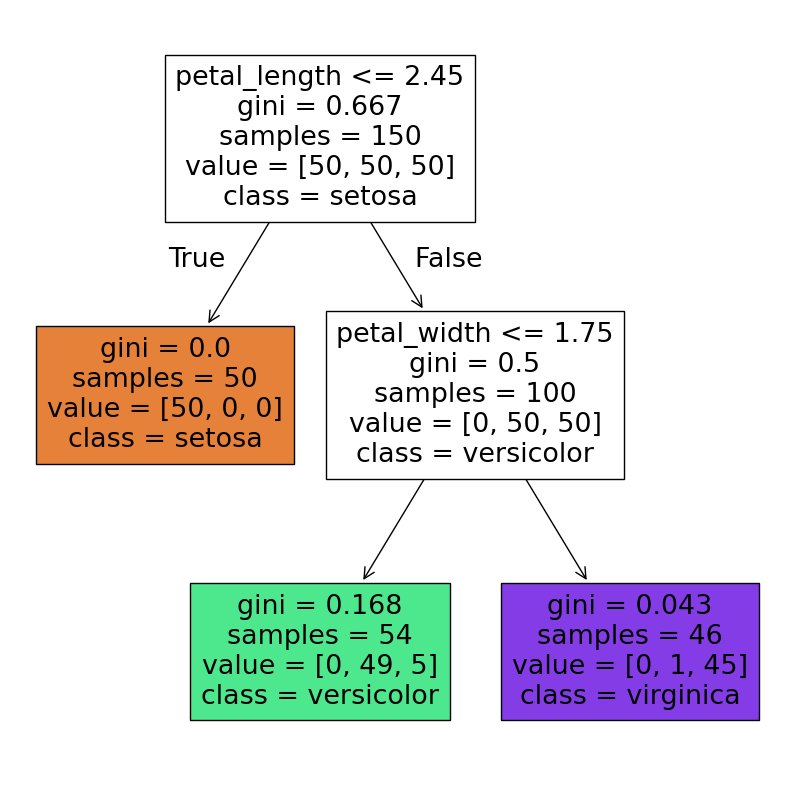

In [160]:
X = df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']]
y = df['species']

clf = DecisionTreeClassifier(random_state=42, max_depth=2)
clf.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, max_depth=2, ax=ax)
plt.show()

# 📊 Introduction to the scikit-learn (Sklearn) library
* Open source library for predictive data analysis. Contains algorithms for classification, clustering and others.

![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_07_meme_01.jpg?raw=true)

- Decision tree https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Train test split https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Accuracy https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [161]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Let's start with splitting the data into the input and output part
* 💡 Usually named as a *X* and *y* variables

In [162]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [163]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [164]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


# What is the size of our data?

In [165]:
X.shape, y.shape

((150, 4), (150,))

## 🔎 Doing evaluation process for every classification or regressions task is mandatory
* Do you know how to evaluate models?
* Do you know **train test split** method for evaluation?
* Do you know any **different** evaluation process?

## Lets continue with train test split process. Split dataset to train:test ratio 60:40. Check how many records/rows do you have in splitted variables.
* 💡 Number of rows in the *X* and *y* in the Train/Test part of the data has to be equal

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## Take a look on data in variable y_test
- Can you detect how many elements of each class is represented in test split?

In [167]:
pd.Series(y_test).value_counts()

,count
species,
setosa,23
versicolor,19
virginica,18


# 🚀 Create the Decision tree classifier instance

In [168]:
clf = DecisionTreeClassifier(random_state=42)

## 💡 Use *fit()* method for training of classifier

In [169]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Lets use trained model for the prediction part
* 💡 Get predictions via the method *predict()*

In [170]:
y_predict = clf.predict(X_test)
y_predict

x_predict = clf.predict(X_train)
x_predict

array(['virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'setosa', 'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'virginica',
       'se

# 🔎 Can we evaluate our model?
* How good is it?
* What does accuracy mean?

In [171]:
accuracy_score(y_test, y_predict)

0.9666666666666667

## How does the trained Decision tree look like?

### We can use either text representation as follows...

In [172]:
print(export_text(clf, show_weights=True, feature_names=list(X.columns.values)))

|--- petal_length <= 2.45
|   |--- weights: [27.00, 0.00, 0.00] class: setosa
|--- petal_length >  2.45
|   |--- petal_width <= 1.75
|   |   |--- petal_length <= 5.35
|   |   |   |--- sepal_length <= 4.95
|   |   |   |   |--- sepal_width <= 2.45
|   |   |   |   |   |--- weights: [0.00, 1.00, 0.00] class: versicolor
|   |   |   |   |--- sepal_width >  2.45
|   |   |   |   |   |--- weights: [0.00, 0.00, 1.00] class: virginica
|   |   |   |--- sepal_length >  4.95
|   |   |   |   |--- sepal_width <= 2.25
|   |   |   |   |   |--- petal_width <= 1.25
|   |   |   |   |   |   |--- weights: [0.00, 1.00, 0.00] class: versicolor
|   |   |   |   |   |--- petal_width >  1.25
|   |   |   |   |   |   |--- weights: [0.00, 0.00, 1.00] class: virginica
|   |   |   |   |--- sepal_width >  2.25
|   |   |   |   |   |--- weights: [0.00, 28.00, 0.00] class: versicolor
|   |   |--- petal_length >  5.35
|   |   |   |--- weights: [0.00, 0.00, 2.00] class: virginica
|   |--- petal_width >  1.75
|   |   |--- pet

### ...or more convinient graphical diagram 😊

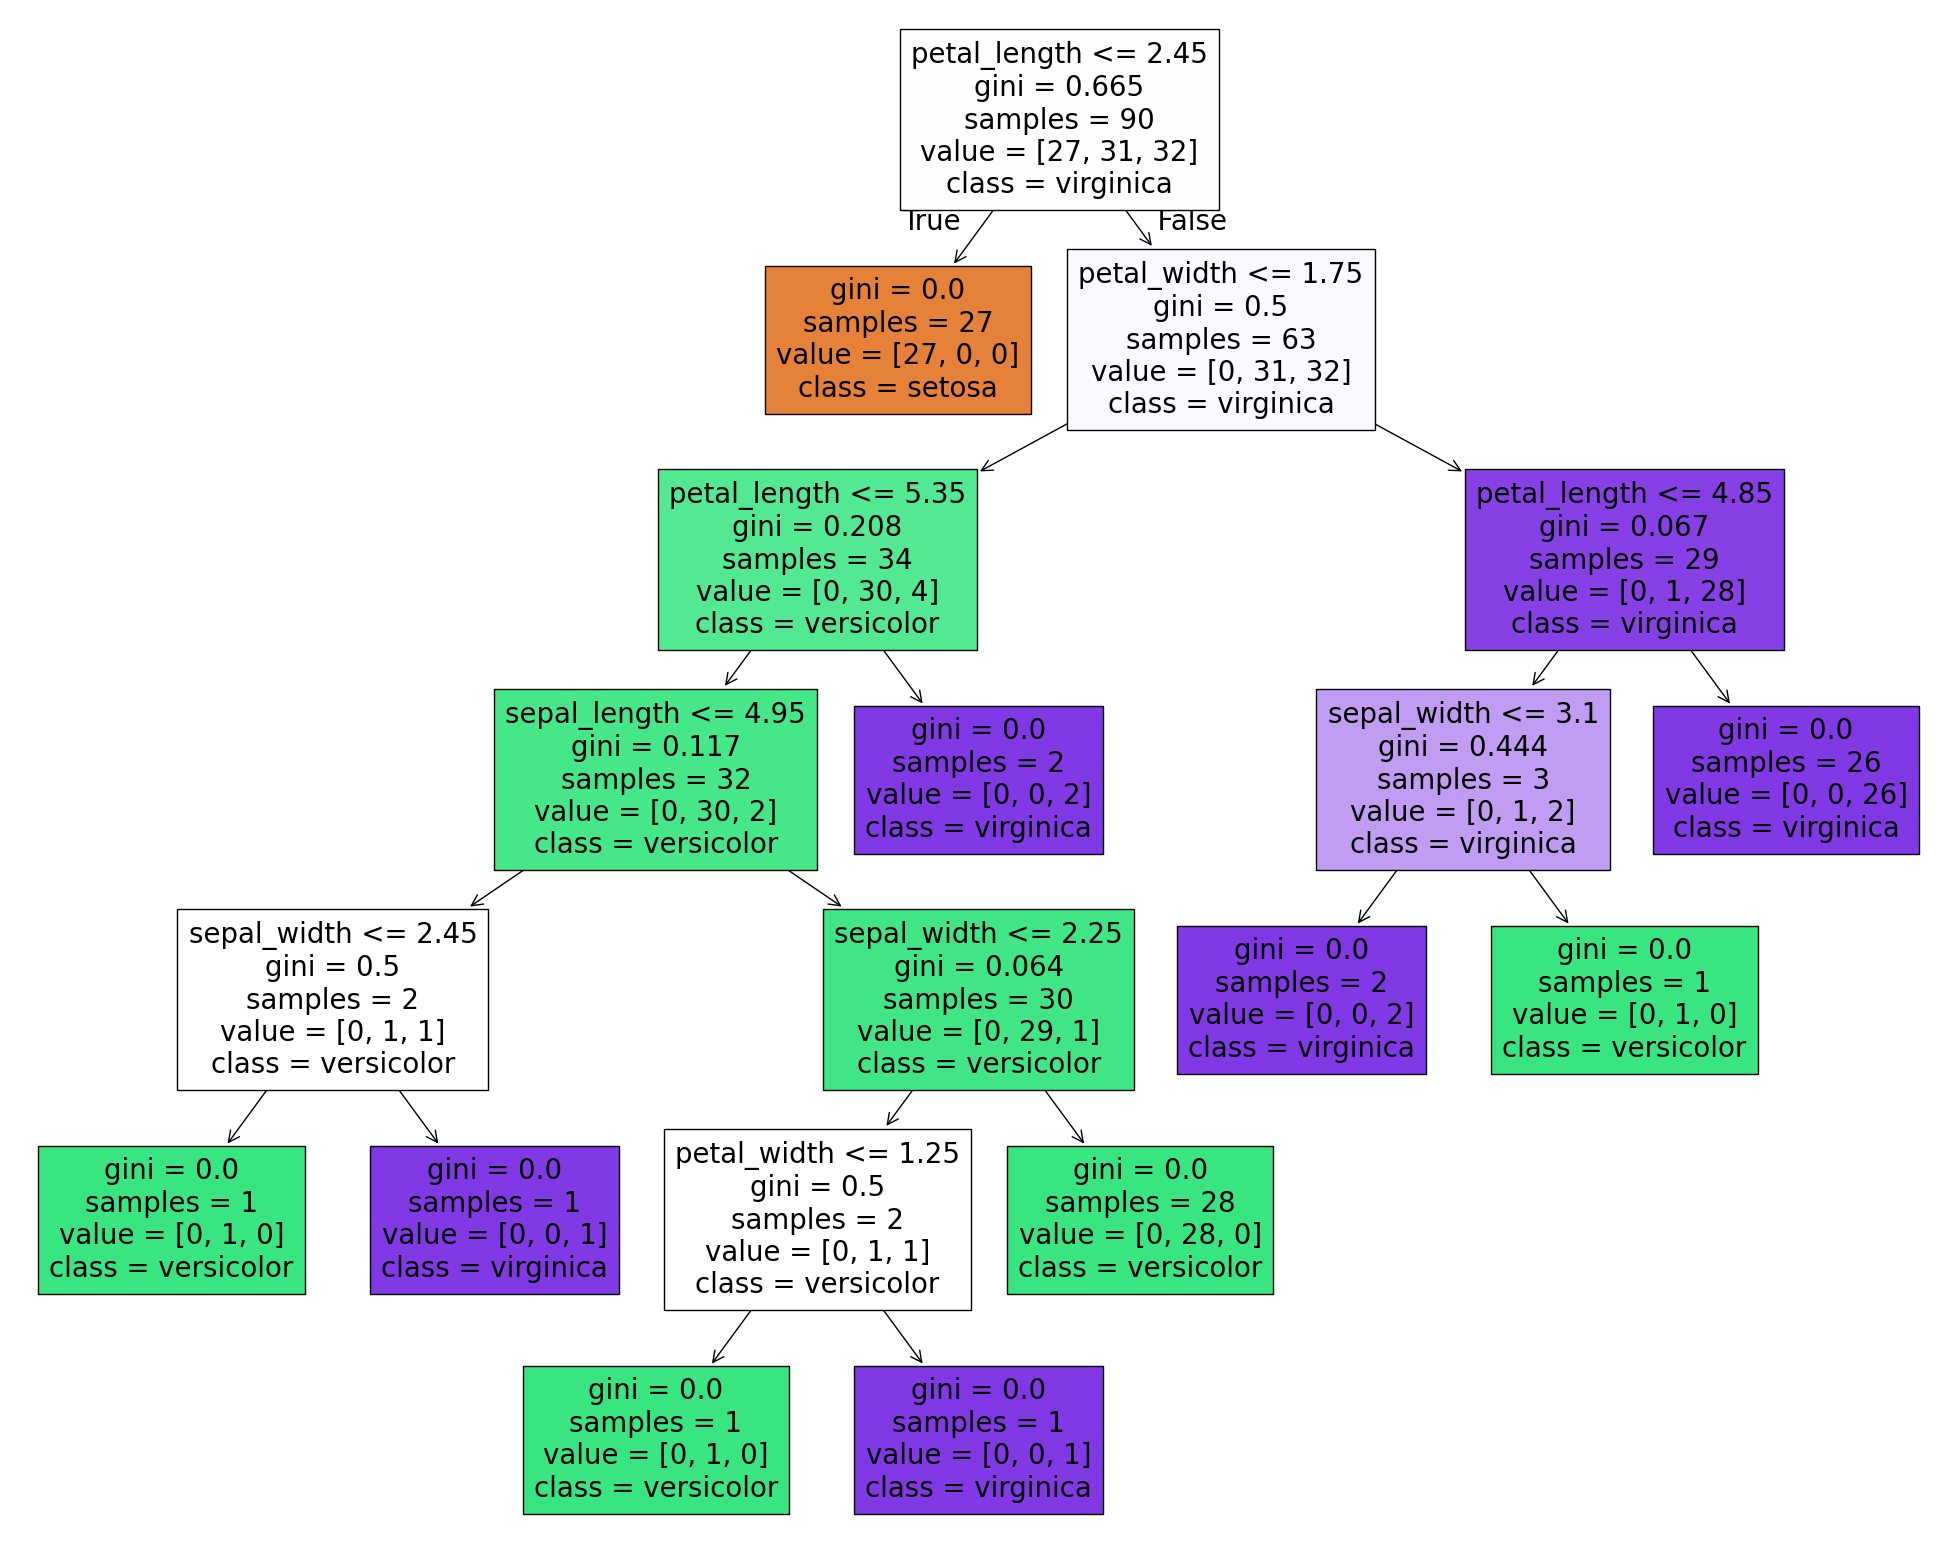

In [173]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf, feature_names=list(X.columns.values), filled=True, class_names=clf.classes_)

# ✅ Task (2p)
* Finish the implementation task from the exercise